In [ ]:
import os
import glob

import numpy as np

import matplotlib.pyplot as plt

import grand.dataio.root_trees as rt

import database.tools as tools

import importlib

#plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

%matplotlib inline

tools.load_logger('debug')

Welcome to JupyROOT 6.30/04


<Logger database.v2.tools (DEBUG)>

In [2]:
RUNS    = [145,10083,10085,10086]
TH1     = 45
TH2     = 35
TQUIET  = 500
TPER    = 1000
TSEPMAX = 200
NCMIN   = 2#1
NCMAX   = 10#7

CHANNELS_FLT0_STR = 'XY'
MODE_FLT0         = 'OR'

N_SAMPLES  = 1024
N_CHANNELS = 3

PLOT_TITLE = f'T1 = {TH1}, T2 = {TH2}, TQUIET = {TQUIET}, TPER = {TPER}, TSEPMAX = {TSEPMAX}, NCMIN = {NCMIN}, NCMAX = {NCMAX}'
PLOT_SUPTITLE = f'GP80, {CHANNELS_FLT0_STR} mode {MODE_FLT0}'

PLOT_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

145
10083
10085
10086


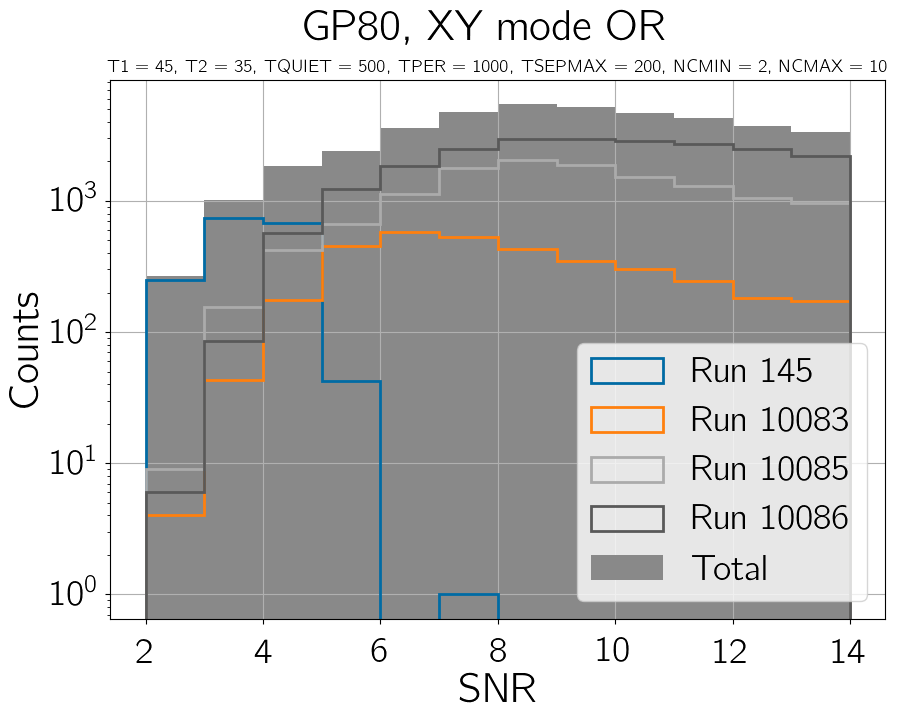

In [3]:
fig, ax = plt.subplots()

snr_tot = np.zeros(0)

for run in RUNS:
    print(run)
    database_dir    = '/sps/grand/pcorrea/nutrig/database/v2/bkg'
    database_subdir = os.path.join(database_dir,f'GP80_RUN_{run}_CH_{CHANNELS_FLT0_STR}_MODE_{MODE_FLT0}_TH1_{TH1}_TH2_{TH2}_TQUIET_{TQUIET}_TPER_{TPER}_TSEPMAX_{TSEPMAX}_NCMIN_{NCMIN}_NCMAX_{NCMAX}')

    path_metadata_file = os.path.join(database_subdir,'metadata.npz')

    database_subdir_filtered = os.path.join(database_subdir,'filtered')
    database_subdir_raw      = os.path.join(database_subdir,'raw')

    paths_data_files_filtered = sorted( glob.glob( os.path.join(database_subdir_filtered,'*.npz') ) )
    paths_data_files_raw      = sorted( glob.glob( os.path.join(database_subdir_raw,'*.npz') ) )

    snr = np.zeros((0,))
    for path_data_file_filtered in paths_data_files_filtered[:]:
        with np.load(path_data_file_filtered) as data_file_filtered:
            snr = np.hstack( ( snr,data_file_filtered['snr'] ) )

    snr_tot = np.hstack((snr_tot,snr))
    ax.hist(snr,bins=np.arange(2,15,1.),label=f'Run {run}',histtype='step',linewidth=2)

ax.hist(snr_tot,bins=np.arange(2,15,1.),label=f'Total',color=PLOT_COLORS[6])

ax.set_xlabel(f'SNR')
ax.set_ylabel('Counts')

ax.set_title(PLOT_TITLE,fontsize=13)
plt.suptitle(PLOT_SUPTITLE)

ax.set_yscale('log')

ax.legend(frameon=True,loc='lower right')

plt.show()

In [7]:
for run in RUNS[:1]:
    print(run)
    database_dir    = '/sps/grand/pcorrea/nutrig/database/v2/bkg'
    database_subdir = os.path.join(database_dir,f'GP80_RUN_{run}_TH1_{TH1}_TH2_{TH2}_TQUIET_{TQUIET}_TPER_{TPER}_TSEPMAX_{TSEPMAX}_NCMIN_{NCMIN}_NCMAX_{NCMAX}')

    path_metadata_file = os.path.join(database_subdir,'metadata.npz')

    database_subdir_filtered = os.path.join(database_subdir,'filtered')
    database_subdir_raw      = os.path.join(database_subdir,'raw')

    paths_data_files_filtered = sorted( glob.glob( os.path.join(database_subdir_filtered,'*.npz') ) )
    paths_data_files_raw      = sorted( glob.glob( os.path.join(database_subdir_raw,'*.npz') ) )

    snr = np.zeros((0,), dtype=float)
    for path_data_file_filtered in paths_data_files_filtered[:]:
        with np.load(path_data_file_filtered) as data_file_filtered:
            try:
                snr = np.hstack( ( snr,data_file_filtered['snr'] ) )
            except:
                print('lol')
                continue

145


(array([133., 317., 393., 583., 219.,  57.,   5.,   0.,   0.,   1.]),
 array([2.30032857, 2.82403014, 3.34773172, 3.87143329, 4.39513487,
        4.91883644, 5.44253802, 5.96623959, 6.48994117, 7.01364274,
        7.53734432]),
 <BarContainer object of 10 artists>)

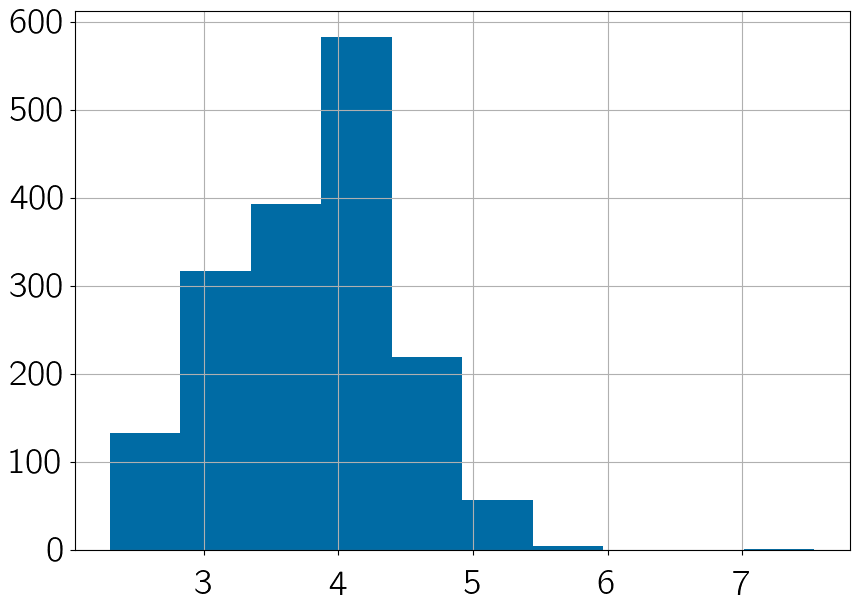

In [9]:
plt.hist(snr)

In [1]:
CHANNELS_FLT0       = [0,1] # (0,1,2) = (X,Y,Z) ASSUMING FLOAT CHANNEL IS DISCARDED
MODE_FLT0           = 'OR' # Mode for the FLT-0. Can be 'OR' or 'AND'

CHANNEL_POL      = {0:'X',1:'Y',2:'Z'}
CHANNELS_FLT_STR = ''
for ch in CHANNELS_FLT0:
    CHANNELS_FLT_STR += CHANNEL_POL[ch]

In [2]:
CHANNELS_FLT_STR

'XY'